# Example: Polynomial Cureve Fitting

Observse a real-valued input variable $x$ $\rightarrow$ predict a real-valued target variable $t$ 

* $\textbf{x} \equiv (x_1, \cdots, x_i, \cdots, x_N)^T, \quad x_i \in [0, 1]$
* $\textbf{t} \equiv (t_1, \cdots, t_i, \cdots, t_N)^T, \quad t_i = \sin(2\pi x_i) + N(\mu, \sigma^2)$

In [1]:
import numpy as np
import matplotlib.pylab as plt

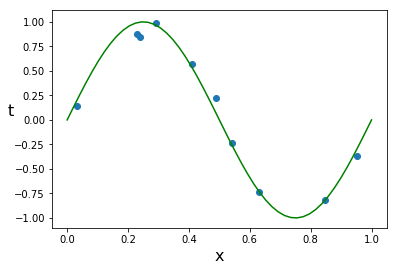

In [2]:
# making data
seed = 62
np.random.seed(seed)
N = 10
x = np.random.rand(N)
t = np.sin(2*np.pi*x) + np.random.randn(N) * 0.1
x_sin = np.linspace(0, 1)
t_sin = np.sin(2*np.pi*x_sin)
plt.plot(x_sin, t_sin, c='green')
plt.scatter(x, t)
plt.xlabel('x', fontsize=16)
plt.ylabel('t', rotation=0, fontsize=16)
plt.show()

* Goal: exploit this training set in order to make predictions of the value $\hat{t}$ of the target variable for some new value $\hat{x}$ of the input variable.
* Use some theories:
    * Probability theory: provides a framework for expressing such uncertainty in a precise and quantitative manner
    * Decision theory: allows us to exploit this probabilistic representation in order to make predictions that are optimal according to appropriate criteria
* For the moment, let's use polynomial function, where $M$ is the order of polynomial. $y(x, \mathbf{w})$ is a linear function of coefficients ($\mathbf{w}$)

$$y(x, \mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^{M} w_j x^j$$

In [3]:
def vandermonde_matrix(x, m):
    """we will introduce vandermonde_matrix, when we find solution of polynomial regression"""
    return np.array([x**i for i in range(m+1)]).T

In [4]:
def polynomial_function(x, w, m):
    assert w.size == m+1, "coefficients number must same as M+1"
    V = vandermonde_matrix(x, m)  # shape (x.size, M+1)
    return np.dot(V, w)

In [5]:
np.random.seed(seed)

M = 3
w = np.random.randn(M+1)
t_hat = polynomial_function(x, w, M)
print(t_hat.round(3))

[-0.03  -0.208  0.016 -0.2   -0.177 -0.162 -0.204 -0.134 -0.14   0.197]


* The values of the coefficients will be determined by fitting the polynomial to the training data, this can be done by minimizing an error function, which measure the misfit between the function $y(x, \mathbf{w})$ and training data points.

$$E(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2$$

In [6]:
def error_function(pred, target):    
    return (1/2)*((pred-target)**2).sum()

In [7]:
error_value = error_function(t_hat, t)
error_value

2.729702853548654

* Because error function is quadratic function of $\mathbf{w}$, its derivatives with respect to the coefficients will be linear in the elements of $\mathbf{w}$, so the minimization of the error function has a unique solution.
* The remain problem is choosing the order $M$, this is called **model comparison or model selection**.
* Then how to choose optimal $M$?
    * use test data with 100 data points
    * evaluate the residual value of error

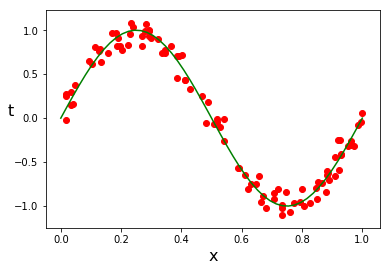

In [8]:
np.random.seed(seed)
N_test = 100 
x_test = np.random.rand(N_test)
t_test = np.sin(2*np.pi*x_test) + np.random.randn(N_test) * 0.1
plt.plot(x_sin, t_sin, c='green')
plt.scatter(x_test, t_test, c='red')
plt.xlabel('x', fontsize=16)
plt.ylabel('t', rotation=0, fontsize=16)
plt.show()

In [9]:
def root_mean_square_error(error, n_samples):
    return np.sqrt(2*error/n_samples)

In [10]:
# M=3
error = error_function(polynomial_function(x_test, w, M), t_test)
rms = root_mean_square_error(error, N_test)
rms

0.7617539583793181

### using normal equation to find soulution

First define $V$(size is $(N, M+1)$) matrix named **Vandermode matrix** which is looks like below. $M$ is degree of polynomial function.

$$V = \begin{bmatrix} 
1 & x_1 & x_1^2 & \cdots & x_1^M  \\
1 & x_2 & x_2^2 & \cdots & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^M
\end{bmatrix}$$

In [11]:
def vandermonde_matrix(x, m):
    """vandermonde matrix"""
    return np.array([x**i for i in range(m+1)]).T

In [12]:
M = 3
V = vandermonde_matrix(x, M)
print(V.round(3))

[[1.    0.034 0.001 0.   ]
 [1.    0.489 0.239 0.117]
 [1.    0.846 0.716 0.606]
 [1.    0.411 0.169 0.07 ]
 [1.    0.631 0.399 0.252]
 [1.    0.291 0.085 0.025]
 [1.    0.543 0.295 0.16 ]
 [1.    0.228 0.052 0.012]
 [1.    0.24  0.058 0.014]
 [1.    0.953 0.909 0.867]]


So, we can define polynomial as $y=V\cdot w$. Where $w$ is a column vector called **coefficients** , $w = [w_0, w_1, \cdots , w_M]^T$

$$y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = 
\begin{bmatrix} w_0 + w_1x_1 + w_2x_1^2 + \cdots + w_Mx_1^M \\ w_0 + w_1x_2 + w_2x_2^2 + \cdots + w_Mx_2^M \\ \vdots \\ 
w_0 + w_1x_N + w_2x_N^2 + \cdots + w_Mx_N^M \end{bmatrix}$$

We already defined error function, $E(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 = \dfrac{1}{2} \Vert y - V \cdot w \Vert^2$. which is can solved by minimization, $\hat{w} = \underset{w}{\arg \min} E(w)$.

Define residual $r = y - V \cdot w$ then error function becomes $E(\mathbf{w}) =  \dfrac{1}{2} r^2 $ Because error function is quadratic function, the minimization of the error function has a unique solution.

Then we can get derivatives, and when it becomes to $0$, error function has minimum value.

$$\begin{aligned} \dfrac{\partial E}{\partial w} &= \begin{bmatrix} \dfrac{\partial E}{\partial w_0} \\ \dfrac{\partial E}{\partial w_1} \\ \vdots \\ \dfrac{\partial E}{\partial w_M} \end{bmatrix} \\
&= \begin{bmatrix} 
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_0} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_0} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_0} \\ 
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_1} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_1} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_1} \\
\vdots \\
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_M} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_M} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_M} 
\end{bmatrix} \\
&= \begin{bmatrix} 
\dfrac{\partial r_1}{\partial w_0} & \dfrac{\partial r_2}{\partial w_0} & \cdots & \dfrac{\partial r_N}{\partial w_0} \\ 
\dfrac{\partial r_1}{\partial w_1} & \dfrac{\partial r_2}{\partial w_1} & \cdots & \dfrac{\partial r_N}{\partial w_1} \\ 
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial r_1}{\partial w_M} & \dfrac{\partial r_2}{\partial w_M} & \cdots & \dfrac{\partial r_N}{\partial w_M} 
\end{bmatrix} \cdot
\begin{bmatrix} \dfrac{\partial E}{\partial r_1} \\ \dfrac{\partial E}{\partial r_2} \\ \vdots \\ \dfrac{\partial E}{\partial r_N} \end{bmatrix} \\
&= \dfrac{\partial r}{\partial w} \cdot \dfrac{\partial E}{\partial r} \\
&= V^T \cdot (y - V\cdot w) = 0
\end{aligned}$$

So, we can find solution of coefficient $w$.

$$w = (V^TV)^{-1}V^Ty$$

In [13]:
def poly_solution(x, t, m):
    V = vandermonde_matrix(x, m)
    return np.linalg.inv(np.dot(V.T, V)).dot(V.T).dot(t)

In [14]:
print(f"Solution of coefficients are {poly_solution(x, t, M).round(3)}")

Solution of coefficients are [ -0.245  11.722 -33.194  21.798]


In [15]:
# confirm we are right
from numpy.polynomial import polynomial as P
print(P.polyfit(x, t, M).round(3))

[ -0.245  11.722 -33.194  21.798]


Let's find optimal degree of polynomial now!

In [16]:
def get_rms_error(t_hat, t, n_sample, m):
    error = error_function(t_hat, t)
    rms = root_mean_square_error(error, n_sample)
    return rms

M=0 | rms_train: 0.6353 rms_test: 0.7221


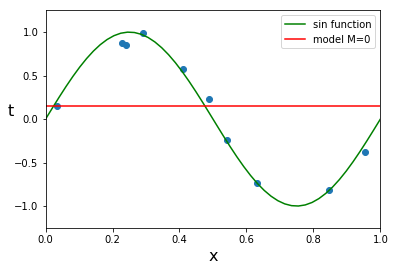

M=1 | rms_train: 0.4227 rms_test: 0.4508


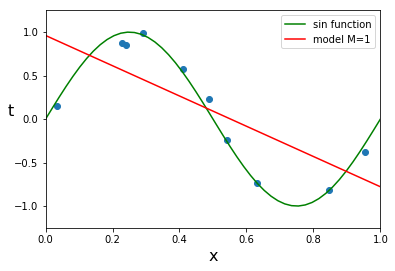

M=2 | rms_train: 0.4111 rms_test: 0.4643


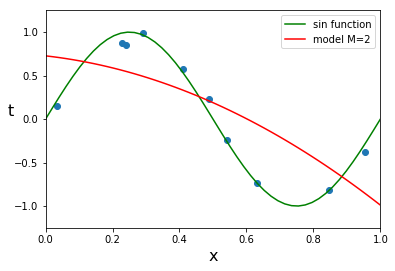

M=3 | rms_train: 0.0930 rms_test: 0.1238


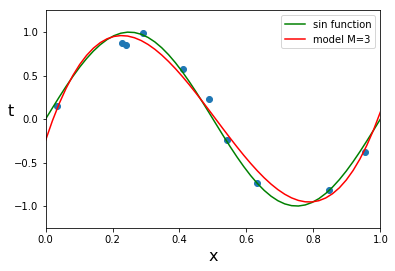

M=4 | rms_train: 0.0906 rms_test: 0.1258


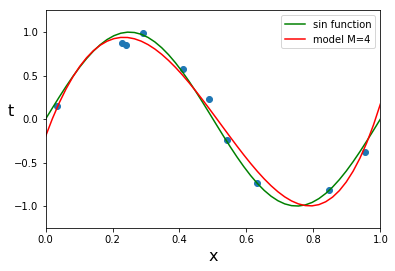

M=5 | rms_train: 0.0350 rms_test: 0.1512


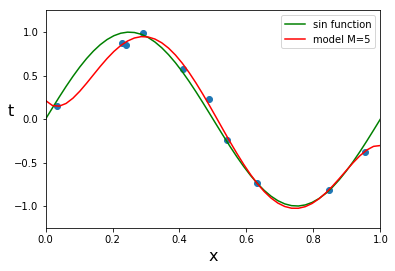

M=6 | rms_train: 0.0349 rms_test: 0.1493


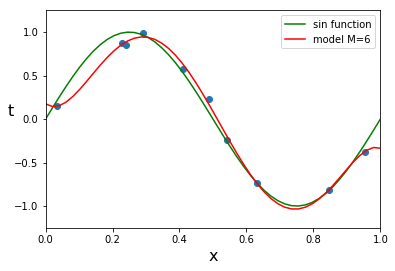

M=7 | rms_train: 0.0338 rms_test: 0.2356


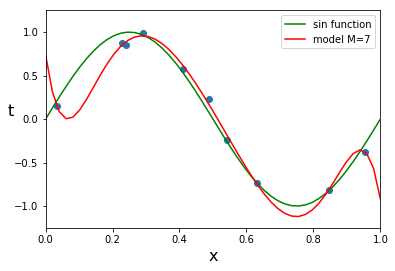

M=8 | rms_train: 0.0289 rms_test: 1.7615


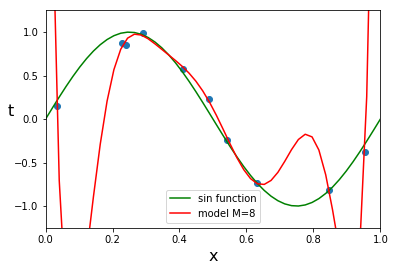

M=9 | rms_train: 0.0872 rms_test: 19.2855


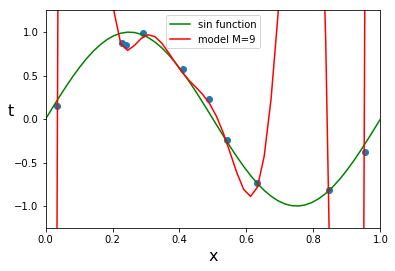

In [17]:
all_w = []
all_rms_train = []
all_rms_test = []

for m in range(10):
    optimal_w = poly_solution(x, t, m)
    t_hat = polynomial_function(x, optimal_w, m)
    t_hat_test = polynomial_function(x_test, optimal_w, m)
    
    rms_train = get_rms_error(t_hat, t, N, m)  # N=10
    rms_test = get_rms_error(t_hat_test, t_test, N_test, m)  # N_test = 100
    print(f"M={m} | rms_train: {rms_train:.4f} rms_test: {rms_test:.4f}")
    
    # Plot predicted line
    plt.plot(x_sin, t_sin, c="green", label="sin function")
    plt.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red", label=f"model M={m}")
    plt.scatter(x, t)
    plt.xlim((0, 1))
    plt.ylim((-1.25, 1.25))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('t', rotation=0, fontsize=16)
    plt.legend()
    plt.show()
    
    all_w.append(optimal_w)
    all_rms_train.append(rms_train)
    all_rms_test.append(rms_test)

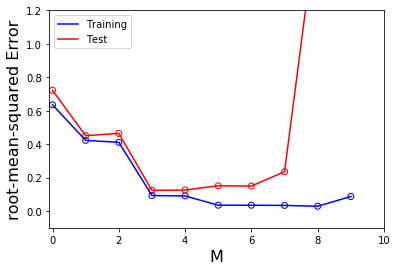

In [18]:
plt.scatter(np.arange(10), all_rms_train, facecolors='none', edgecolors='b')
plt.plot(np.arange(10), all_rms_train, c='b', label='Training')
plt.scatter(np.arange(len(all_rms_test)), all_rms_test, facecolors='none', edgecolors='r')
plt.plot(np.arange(len(all_rms_test)), all_rms_test, c='r', label='Test')
plt.legend()
plt.xlim((-0.1, 10))
plt.ylim((-0.1, 1.2))
plt.ylabel("root-mean-squared Error", fontsize=16)
plt.xlabel("M", fontsize=16)
plt.show()

In [19]:
np.set_printoptions(precision=3)
for i in [0, 1, 3, 9]:
    print(f"coefficients at M={i} is {all_w[i].round(3)}")

coefficients at M=0 is [0.149]
coefficients at M=1 is [ 0.961 -1.739]
coefficients at M=3 is [ -0.245  11.722 -33.194  21.798]
coefficients at M=9 is [-5.400e+01  2.606e+03 -3.763e+04  2.686e+05 -1.111e+06  2.839e+06
 -4.546e+06  4.438e+06 -2.411e+06  5.575e+05]


### Test for Different size of datas

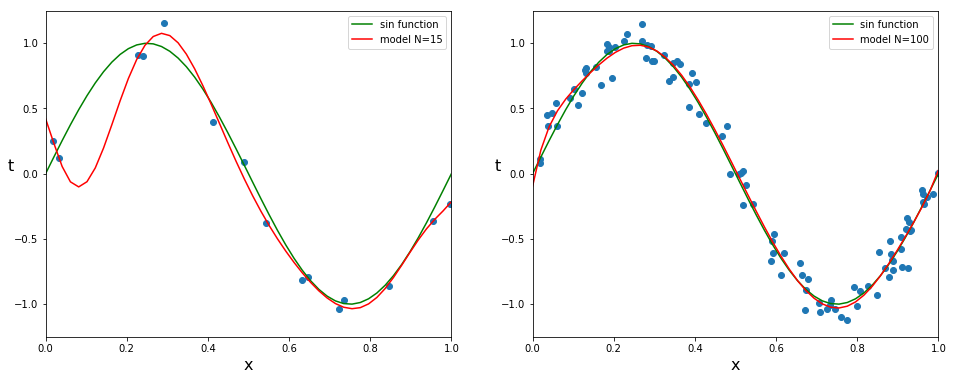

In [20]:
np.random.seed(seed)
N1 = 15
N2 = 100 
x1, x2 = np.random.rand(N1), np.random.rand(N2)
t1 = np.sin(2*np.pi*x1) + np.random.randn(N1) * 0.1
t2 = np.sin(2*np.pi*x2) + np.random.randn(N2) * 0.1

optimal_w1 = poly_solution(x1, t1, m=9)
optimal_w2 = poly_solution(x2, t2, m=9)

# Plot predicted line
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

def plot(x, t, x_sin, t_sin, optimal_w, m, ax):
    ax.plot(x_sin, t_sin, c="green", label="sin function")
    ax.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red", label=f"model N={len(x)}")
    ax.scatter(x, t)
    ax.set_xlim((0, 1))
    ax.set_ylim((-1.25, 1.25))
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('t', rotation=0, fontsize=16)
    ax.legend()
    
plot(x1, t1, x_sin, t_sin, optimal_w1, m=9, ax=ax1)
plot(x2, t2, x_sin, t_sin, optimal_w2, m=9, ax=ax2)

plt.show()

## Regularization

$$
E(\mathbf{w}) = \dfrac{1}{2} \Vert y - V \cdot w \Vert^2 + \frac{\lambda}{2} \Vert w \Vert^2 \qquad \cdots (4)
$$

where, $\Vert \mathbf{w} \Vert^2 \equiv \mathbf{w}^T\mathbf{w}=w_0^2 + w_1^2 + \cdots w_M^2$

easy to get solution for this

$$
\begin{aligned}
\frac{\partial E(w)}{\partial w} &= V^Ty-V^TV\cdot w+\lambda w = 0 \\
w &= (V^TV- \lambda I_{(M+1)})^{-1}V^Ty
\end{aligned}
$$

when regularizer $\lambda \uparrow$, means that more regularization  

In [21]:
def ridge_solution(x, t, m, alpha=0):
    V = vandermonde_matrix(x, m)
    return np.linalg.inv(np.dot(V.T, V) - alpha * np.eye(m+1)).dot(V.T).dot(t)

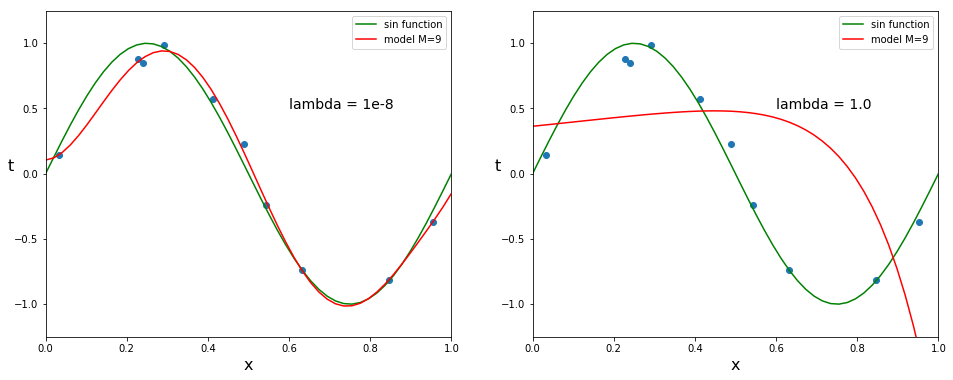

In [22]:
M=9
optimal_w1 = ridge_solution(x, t, m=M, alpha=1e-8)
optimal_w2 = ridge_solution(x, t, m=M, alpha=1.0)

# Plot predicted line
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

def plot_ridge(x, t, x_sin, t_sin, optimal_w, m, text, ax):
    ax.plot(x_sin, t_sin, c="green", label="sin function")
    ax.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red", label=f"model M={m}")
    ax.scatter(x, t)
    ax.set_xlim((0, 1))
    ax.set_ylim((-1.25, 1.25))
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('t', rotation=0, fontsize=16)
    ax.legend()
    ax.annotate(text, (0.6, 0.5), fontsize=14)
    
plot_ridge(x, t, x_sin, t_sin, optimal_w1, m=M, text='lambda = 1e-8', ax=ax1)
plot_ridge(x, t, x_sin, t_sin, optimal_w2, m=M, text='lambda = 1.0', ax=ax2)

plt.show()

In [23]:
print(f"coefficients at lambda=1e-8 is {optimal_w1.round(3)}")
print(f"coefficients at lambda=1.0 is {optimal_w2.round(3)}")

coefficients at lambda=1e-8 is [  0.104   0.223  33.063 -91.357   3.467  90.523  39.05  -58.172 -72.941
  55.889]
coefficients at lambda=1.0 is [ 0.364  0.321  0.074 -0.155 -0.312 -0.409 -0.465 -0.495 -0.507 -0.51 ]


## see ridge effect

In [24]:
all_w = []
all_rms_train = []
all_rms_test = []
M = 9

for alpha in np.exp(np.arange(-28, -15)):
    optimal_w = ridge_solution(x, t, m=M, alpha=alpha)
    t_hat = polynomial_function(x, optimal_w, m=M)
    t_hat_test = polynomial_function(x_test, optimal_w, m=M)
    
    rms_train = get_rms_error(t_hat, t, N, m=M)
    rms_test = get_rms_error(t_hat_test, t_test, N_test, m=M)  # N_test = 100
    print(f"lambda={alpha} | rms_train: {rms_train:.4f} rms_test: {rms_test:.4f}")
    
    # Plot predicted line
#     plt.plot(x_sin, t_sin, c="green", label="sin function")
#     plt.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red", label=f"model M={m}")
#     plt.scatter(x, t)
#     plt.xlim((0, 1))
#     plt.ylim((-1.25, 1.25))
#     plt.xlabel('x', fontsize=16)
#     plt.ylabel('t', rotation=0, fontsize=16)
#     plt.legend()
#     plt.show()
    
    all_w.append(optimal_w)
    all_rms_train.append(rms_train)
    all_rms_test.append(rms_test)

lambda=6.914400106940203e-13 | rms_train: 0.0427 rms_test: 1.8286
lambda=1.8795288165390832e-12 | rms_train: 0.0362 rms_test: 0.6353
lambda=5.109089028063325e-12 | rms_train: 0.0348 rms_test: 0.3696
lambda=1.3887943864964021e-11 | rms_train: 0.0344 rms_test: 0.2973
lambda=3.775134544279098e-11 | rms_train: 0.0343 rms_test: 0.2842
lambda=1.026187963170189e-10 | rms_train: 0.0344 rms_test: 0.3161
lambda=2.7894680928689246e-10 | rms_train: 0.0425 rms_test: 0.7409
lambda=7.582560427911907e-10 | rms_train: 0.0377 rms_test: 0.1632
lambda=2.061153622438558e-09 | rms_train: 0.0356 rms_test: 0.1295
lambda=5.602796437537268e-09 | rms_train: 0.0353 rms_test: 0.1352
lambda=1.522997974471263e-08 | rms_train: 0.0353 rms_test: 0.1380
lambda=4.139937718785167e-08 | rms_train: 0.0365 rms_test: 0.1470
lambda=1.1253517471925912e-07 | rms_train: 0.2402 rms_test: 1.3561


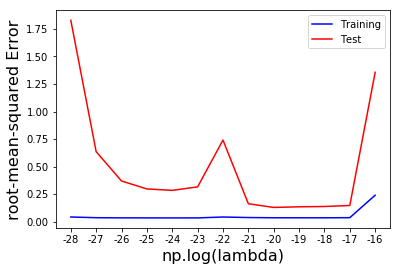

In [25]:
plt.plot(np.arange(len(all_rms_train)), all_rms_train, c='b', label='Training')
plt.plot(np.arange(len(all_rms_test)), all_rms_test, c='r', label='Test')
plt.legend()
plt.xticks(np.arange(len(all_rms_test)), np.arange(-28, -15))
plt.ylabel("root-mean-squared Error", fontsize=16)
plt.xlabel("np.log(lambda)", fontsize=16)
plt.show()